In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
import pandas as pd
housing_data=pd.DataFrame(housing.data,columns=housing.feature_names)
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing_data['MedHouseVal']=housing.target

In [ ]:
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<ipython-input-8-2e0de48251a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['MedHouseVal'],bins=50)


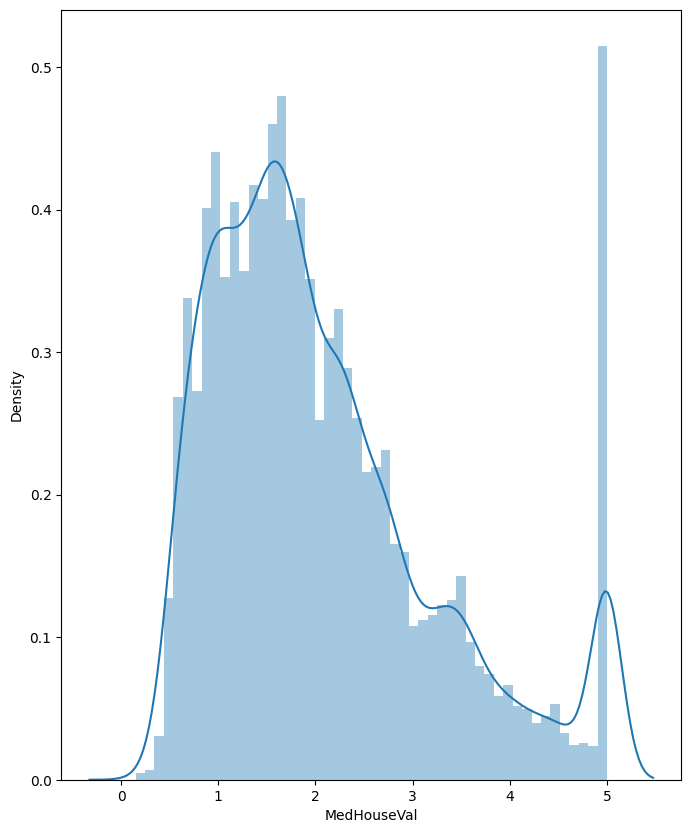

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,10))
sns.distplot(housing_data['MedHouseVal'],bins=50)
plt.show()

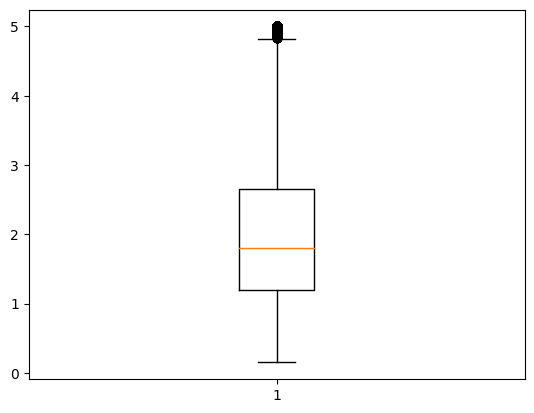

In [ ]:
plt.boxplot(housing_data['MedHouseVal'])
plt.show()

In [ ]:
q1 = np.percentile(housing_data['MedHouseVal'],25)
q3 = np.percentile(housing_data['MedHouseVal'],75)
IQR= q3 - q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
housing_data['MedHouseVal']=np.where(housing_data['MedHouseVal']<lb,housing_data['MedHouseVal'].median(),housing_data['MedHouseVal'])
housing_data['MedHouseVal']=np.where(housing_data['MedHouseVal']>ub,housing_data['MedHouseVal'].median(),housing_data['MedHouseVal'])

<ipython-input-11-2e0de48251a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['MedHouseVal'],bins=50)


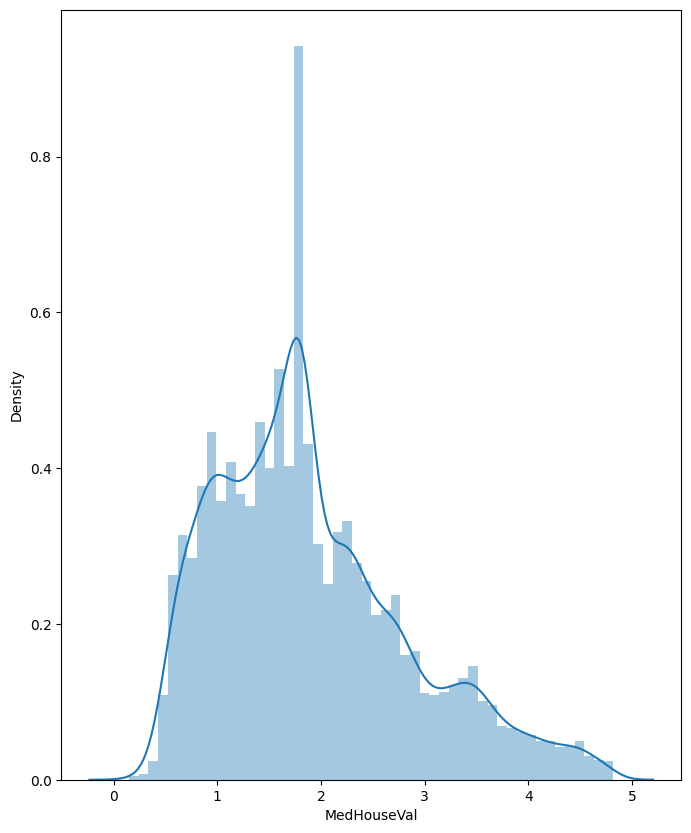

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,10))
sns.distplot(housing_data['MedHouseVal'],bins=50)
plt.show()

<Axes: >

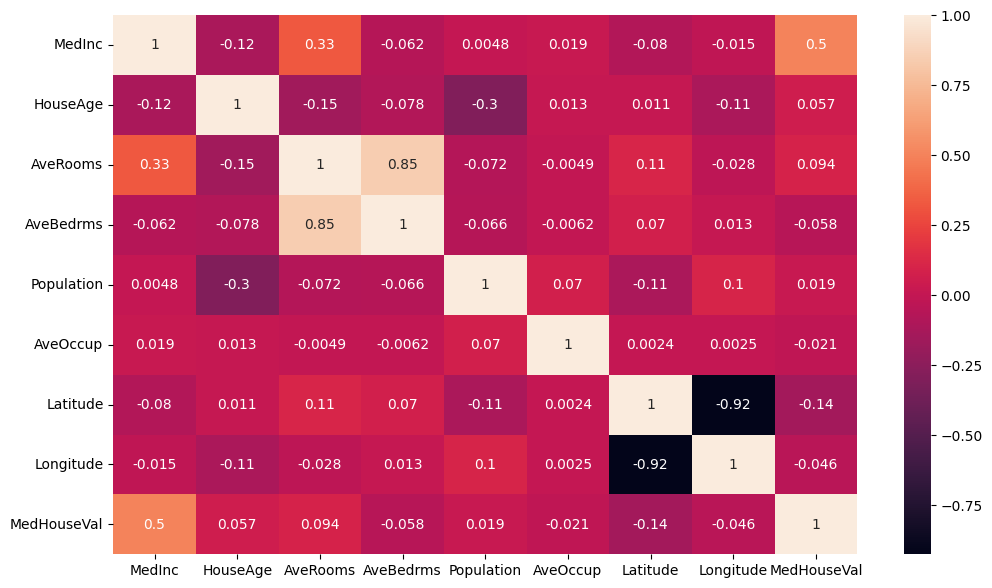

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(housing_data.corr(),annot=True)

In [ ]:
pd.DataFrame(housing_data.corr().round(2)['MedHouseVal'].\
             drop('MedHouseVal')).\
             sort_values(by='MedHouseVal')

,MedHouseVal
Latitude,-0.14
AveBedrms,-0.06
Longitude,-0.05
AveOccup,-0.02
Population,0.02
HouseAge,0.06
AveRooms,0.09
MedInc,0.50


In [ ]:
X= housing_data.drop('MedHouseVal',axis=1)  # input data having only two columns i.e RM and lSTAT
y= housing_data['MedHouseVal']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=1234)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Step-1: import the package
# step-2: save the package
# step-3: apply fit transform

linear_model= LinearRegression()
# fit the model/ model creation based on train data
linear_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
linear_model.coef_

array([ 1.95411404e-01,  1.21921388e-03,  9.71952147e-03,  7.31311066e-02,
        1.40334856e-05, -2.32616269e-03, -4.54795976e-01, -4.66427226e-01])

In [ ]:
linear_model.intercept_

-38.59990671278721

In [ ]:
y_test_predictions= linear_model.predict(X_test)

In [ ]:
from statsmodels.api import OLS
OLS(Y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                          1.323e+04
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                        0.00
Time:                        13:11:25   Log-Likelihood:                         -19280.
No. Observations:               16512   AIC:                                  3.858e+04
Df Residuals:                   16504   BIC:                                  3.864e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.2794      0.005     58.168      0.000       0.270       0.289
HouseAge       0.0076      0.001     14.691      0.000       0.007       0.009
AveRooms      -0.0772      0.007    -10.997      0.000      -0.091      -0.063
AveBedrms      0.3161      0.033      9.629      0.000       0.252       0.380
Population  2.611e-05   5.74e-06      4.550      0.000    1.49e-05    3.74e-05
AveOccup      -0.0029      0.001     -5.086      0.000      -0.004      -0.002
Latitude      -0.0806      0.004    -20.052      0.000      -0.088      -0.073
Longitude     -0.0294      0.001    -23.111      0.000      -0.032      -0.027
==============================================================================
Omnibus:                     1253.616   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2301.991
Skew:                           0.546   Prob(JB):                         0.00
Kurtosis:                       4.467   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train.shape, Y_train.shape

((16512, 8), (16512,))

In [ ]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17595,3.3682,40.0,6.045902,1.114754,719.0,2.357377,37.31,-121.89
6073,11.1077,32.0,8.010526,1.063158,295.0,3.105263,34.07,-117.85
6251,4.1190,32.0,4.651235,0.910494,1326.0,4.092593,34.04,-117.97
3161,1.7656,26.0,4.149367,0.891139,1222.0,3.093671,35.23,-118.85
1887,3.1500,27.0,6.721805,1.518797,1010.0,2.531328,38.92,-119.98
...,...,...,...,...,...,...,...,...
8222,5.0000,21.0,3.062500,0.875000,29.0,1.812500,33.76,-118.23
9449,2.7530,14.0,5.789030,1.170886,1153.0,2.432489,37.39,-119.85
8471,4.2083,33.0,5.026163,1.151163,1073.0,3.119186,33.91,-118.32
17048,6.7058,44.0,6.335430,0.991614,1235.0,2.589099,37.47,-122.27


In [ ]:
X_train.values.shape,Y_train.values.shape

((16512, 8), (16512,))

In [ ]:
mse=mean_squared_error(Y_test,y_test_predictions)
rmse=np.sqrt(mse)
r_square= r2_score(Y_test,y_test_predictions)
print("MSE:",mse)
print('RMSE:',rmse)
print("R_Square:",r_square)

MSE: 0.510266400987274
RMSE: 0.7143293365019205
R_Square: 0.40815167772165795


In [ ]:
#plt.scatter(X_train.values,Y_train.values,color='g')
#plt.plot(X_test, y_test_predictions,color='k')

ValueError: ignored

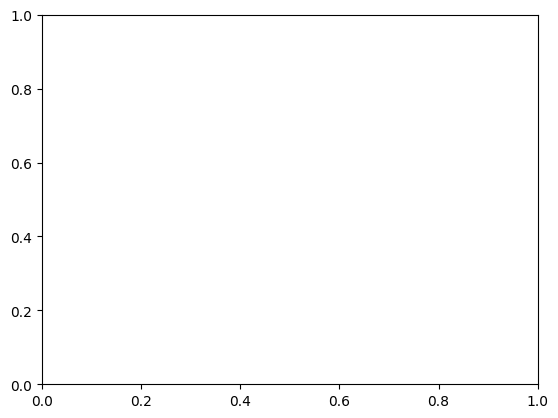

In [ ]:
plt.scatter(X_train, Y_train, color = 'red')

In [ ]:
import pickle
pickle.dump(linear_model, open('model.pkl','wb'))

In [ ]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [ ]:
model.predict(X_test)

array([2.23606134, 2.30816604, 2.26297435, ..., 0.92288657, 2.15161111,
       1.44124852])